In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wG562ndUjk0OD6__604ziaiCXKM2zbVl4ye0We8rtgspPgrtsf3l2c
Mounted at /content/gdrive
time: 22.2 s


In [4]:
% cd "/content/gdrive/My Drive/efnn"

/content/gdrive/My Drive/efnn
time: 16.5 ms


In [5]:
!pip install ipython-autotime
%load_ext autotime
% tensorflow_version 2.x
import numpy as np
import tensorflow as tf
import cv2
import os

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.64 s


In [19]:
DATASET = '50TH'

MODELS = "/content/gdrive/My Drive/efnn/npy-new/models/" + DATASET
RESULTS = "/content/gdrive/My Drive/efnn/npy-new/results/" + DATASET

models = os.listdir(MODELS)
if '.ipynb_checkpoints' in models:
    del models[models.index('.ipynb_checkpoints')]

models = list(filter(lambda x : ('256-' in x), models))

models

['256-01-0.81-0.01341.hdf5',
 '256-02-0.91-0.00391.hdf5',
 '256-03-0.93-0.00351.hdf5',
 '256-04-0.93-0.00342.hdf5',
 '256-05-0.93-0.00336.hdf5',
 '256-06-0.93-0.00332.hdf5',
 '256-07-0.93-0.00328.hdf5',
 '256-08-0.93-0.00325.hdf5',
 '256-09-0.93-0.00322.hdf5',
 '256-10-0.93-0.00320.hdf5',
 '256-11-0.93-0.00317.hdf5',
 '256-12-0.93-0.00315.hdf5',
 '256-13-0.93-0.00312.hdf5',
 '256-14-0.93-0.00310.hdf5',
 '256-15-0.93-0.00308.hdf5',
 '256-16-0.93-0.00307.hdf5',
 '256-17-0.93-0.00305.hdf5',
 '256-18-0.92-0.00303.hdf5',
 '256-19-0.92-0.00302.hdf5',
 '256-20-0.92-0.00301.hdf5']

time: 12.7 ms


In [ ]:
# models = os.listdir(MODELS)
# for model in models:
#     os.rename(os.path.join(MODELS, model), os.path.join(MODELS, model.replace('-OTHER', '')))

time: 145 ms


In [8]:
from tqdm.notebook import tqdm
from efnn.efimg import Exposures

SAMPLES_DIR = "/content/gdrive/My Drive/efnn/dataset/jpg"
SAMPLES = {
    'BandonSunset(2)': ['-6', '-2', '+1'],
    'HDRMark': ['-8', '-4', '+1'],
    'OCanadaLights': ['-8', '-3', '+0'],
    'Zentrum': ['-7', '-3', '+1'],
}

for sample_name, sample_evs in SAMPLES.items():
    print(f"Processing : {sample_name}")

    x = Exposures(
        os.path.join(SAMPLES_DIR, sample_name),
        evs = [f'{sample_name}-EV{ev}' for ev in sample_evs]
    )

    x.create_np_data()

    for model_name in tqdm(models):
        model = tf.keras.models.load_model(MODELS + '/' + model_name)

        fusion = model.predict_on_batch(x.np_data['data'] / 255) * 255

        if not os.path.exists( os.path.join(RESULTS, sample_name) ):
            os.mkdir( os.path.join(RESULTS, sample_name) )

        # print('Saving to :', os.path.join(RESULTS, sample_name , f"{sample_name}-{model_name}.jpg"))
        cv2.imwrite(os.path.join(RESULTS, sample_name , f"{sample_name}-{model_name}.jpg"), fusion.reshape(x.ef.shape))
        # break
    # break


Processing : BandonSunset(2)



Processing : HDRMark



Processing : OCanadaLights



Processing : Zentrum



time: 2min 4s


In [21]:
SAMPLES_DIR = "/content/gdrive/My Drive/efnn/EXTERNAL_SAMPLES"
SAMPLE = 'SAMPLE001'
EVS = ['-3', '+0', '+3']

SAMPLE = 'Venice-Grand-Canal'
EVS = ['-1', '+0', '+1']

SAMPLES_DIR = "/content/gdrive/My Drive/efnn/sample-bracketed-photos"
SAMPLE = 'Cove-Point-Lighthouse'
EVS = ['-1', '+0', '+1']

if not os.path.exists( os.path.join(RESULTS, SAMPLE) ):
    os.mkdir( os.path.join(RESULTS, SAMPLE) )

for model_name in tqdm(models):
    model = tf.keras.models.load_model(MODELS + '/' + model_name)

    x = Exposures(
        os.path.join(SAMPLES_DIR, SAMPLE), 
        evs = [f'{SAMPLE}-EV{ev}' for ev in EVS]
    )

    x.create_np_data()

    fusion = model.predict_on_batch(x.np_data['data'] / 255) * 255
    
    cv2.imwrite(os.path.join(RESULTS, SAMPLE, f"{SAMPLE}-{model_name}.jpg"), fusion.reshape(x.exposures[x.evs[0]].shape))



time: 12.4 s


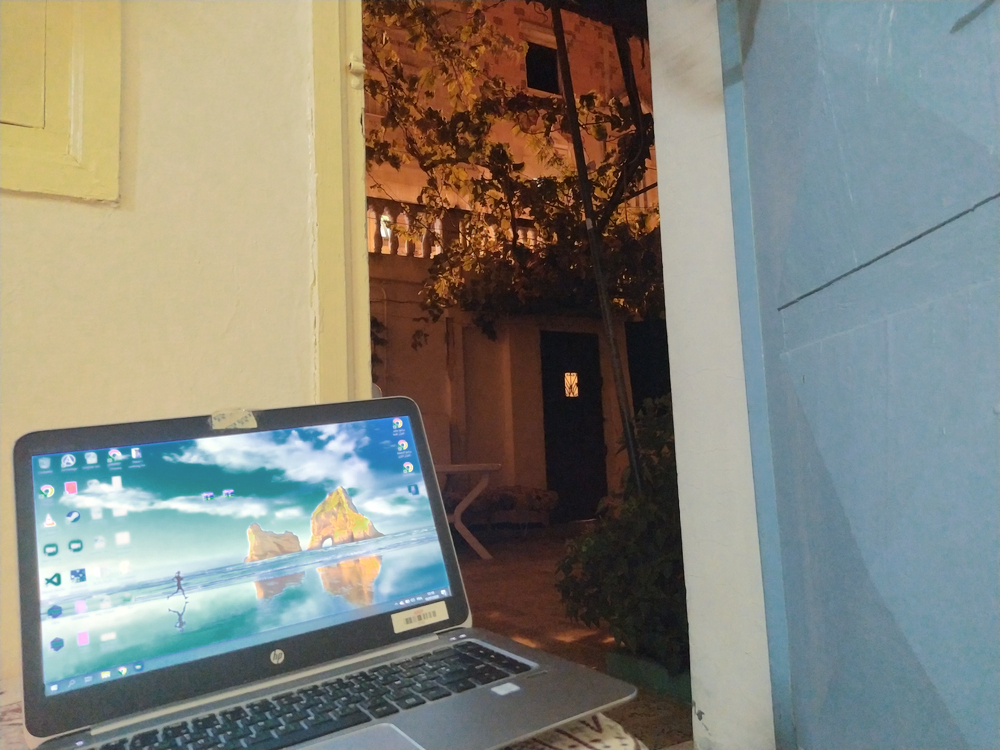

time: 538 ms


In [11]:
from google.colab.patches import cv2_imshow

cv2_imshow(fusion.reshape(x.ef.shape))